<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
raw_pd=''
data_dict = {}
with open('sat_scores.csv') as f:
    raw_pd = f.read()
    #print raw_pd
lines = str.split(raw_pd,'\n')
lines2 = [str.split(l, ',') for l in lines]
for i in lines2[0]:
    data_dict[i] = []
    
for i in range(1,len(lines2)):
    for ind,item in enumerate(lines2[i]):
        if len(item) > 0:
            data_dict[lines2[0][ind]].append(item)

#print(data_dict)

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df1 = pd.DataFrame(data_dict)

df2 = pd.read_csv('sat_scores.csv')

#print (df1)
#print (df2)

#difference in order of columns, since dictionaries are unordered

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
df1.head(10)

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520
5,499,71,RI,501
6,499,71,PA,500
7,506,69,VT,511
8,500,69,ME,506
9,501,68,VA,510


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
data_dict={}
#names.
data_dict['names']=[n for n in df1.columns]
data_dict['types']=[df1[n].dtype for n in df1.columns]
data_dict['desc'] =[df1[n].describe() for n in df1.columns]
data_dict['shape'] = df1.shape
data_dict

{'desc': [count      52
  unique     38
  top       499
  freq        6
  Name: Math, dtype: object, count     52
  unique    36
  top        4
  freq       3
  Name: Rate, dtype: object, count     52
  unique    52
  top       SD
  freq       1
  Name: State, dtype: object, count      52
  unique     39
  top       562
  freq        3
  Name: Verbal, dtype: object],
 'names': ['Math', 'Rate', 'State', 'Verbal'],
 'shape': (52, 4),
 'types': [dtype('O'), dtype('O'), dtype('O'), dtype('O')]}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [6]:
df1['Rate'] = map(int,df1['Rate'])
df1['Math'] = map(int, df1['Math'])
df1['Verbal'] = map(int, df1['Verbal'])
# df1['Math'].value_counts()
#

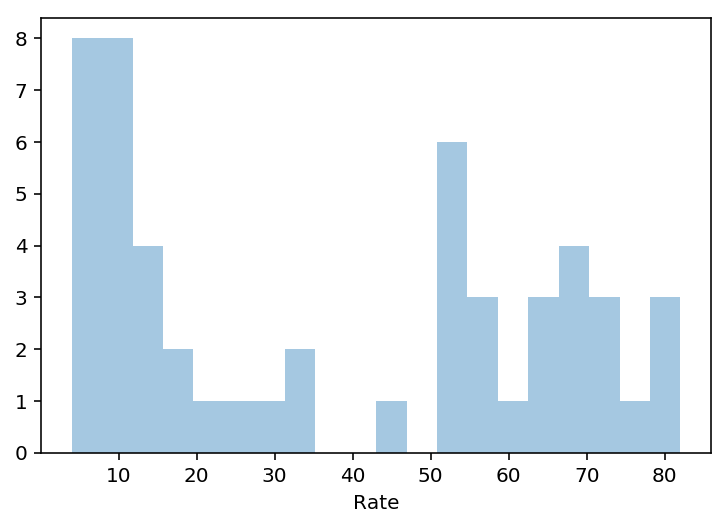

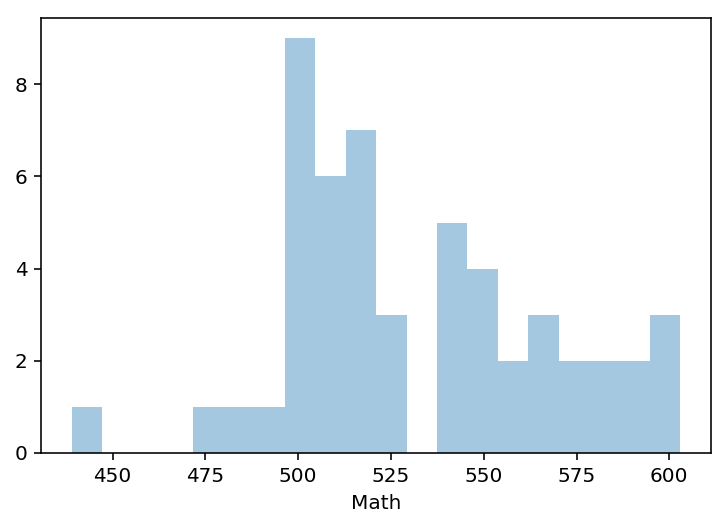

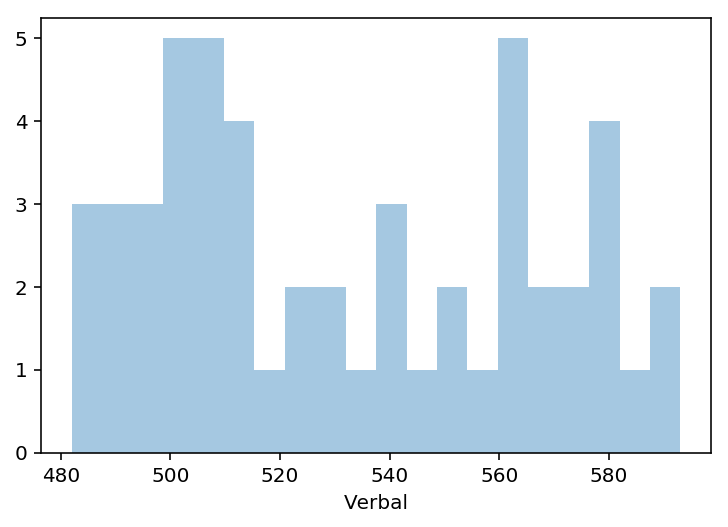

In [7]:
sns.distplot(df1['Rate'],kde=False,bins=20)
plt.figure()
sns.distplot(df1['Math'],kde=False,bins=20)
plt.figure()
sns.distplot(df1['Verbal'],kde=False,bins=20)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

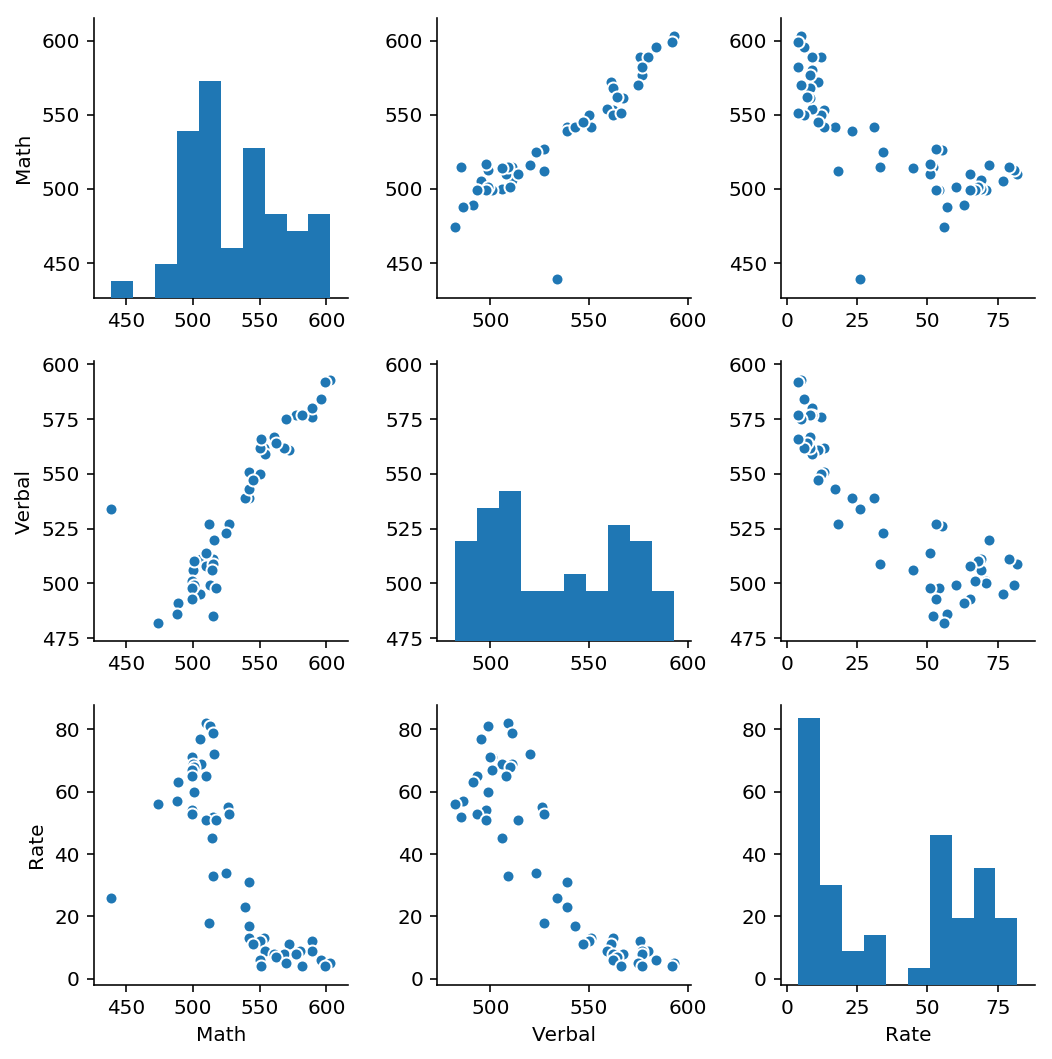

In [8]:
sns.pairplot(df1.loc[:,['Math','Verbal','Rate']])
#Math v Verbal: +ve linear correlation
#Math v Rate: -ve correlation, not as strong
#Verbal v Rate: -ve correlatoin, not as strong

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

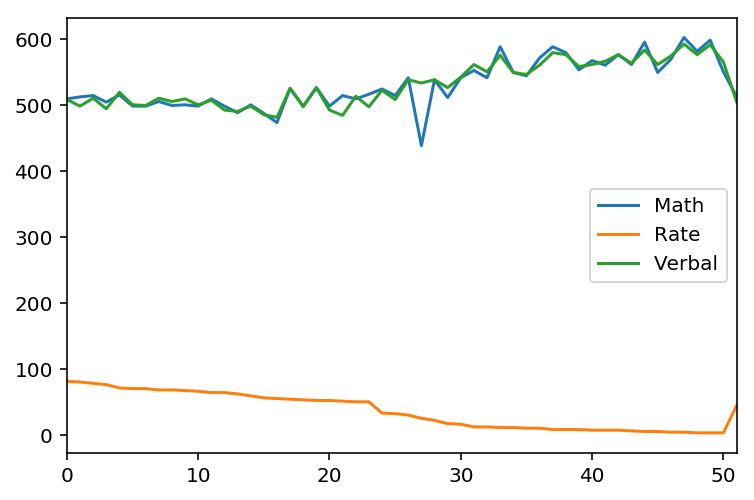

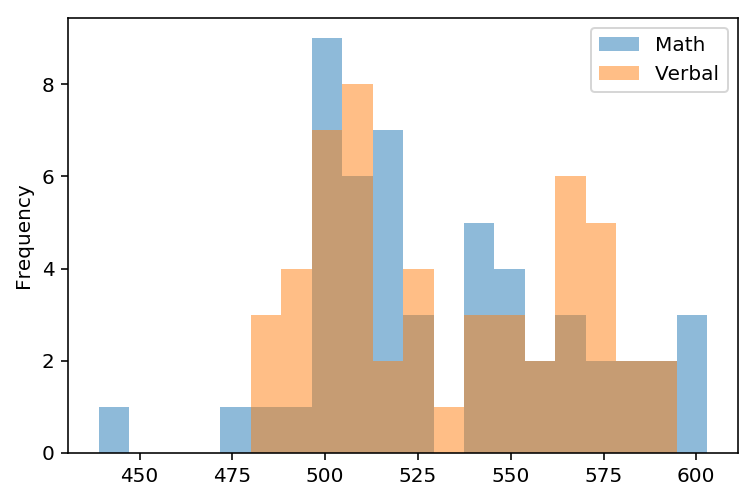

In [9]:
df1.plot()
df1.loc[:,['Math','Verbal']].plot.hist(alpha=0.5,bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

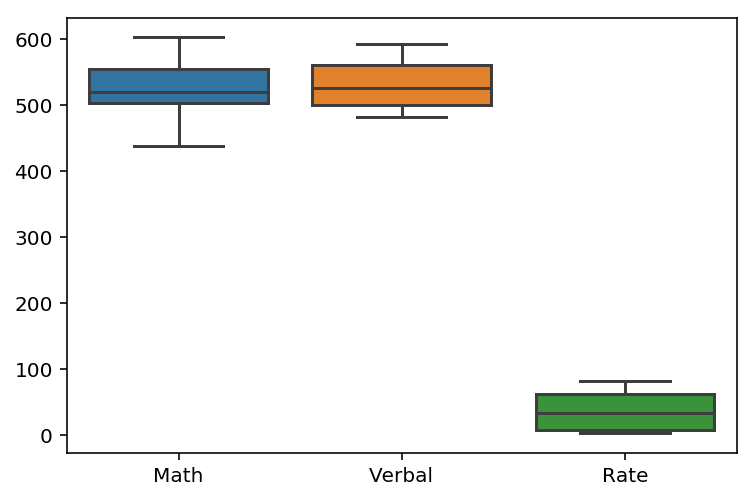

In [10]:
sns.boxplot(data=df1.loc[:,['Math','Verbal','Rate']])
#data is not normalized

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


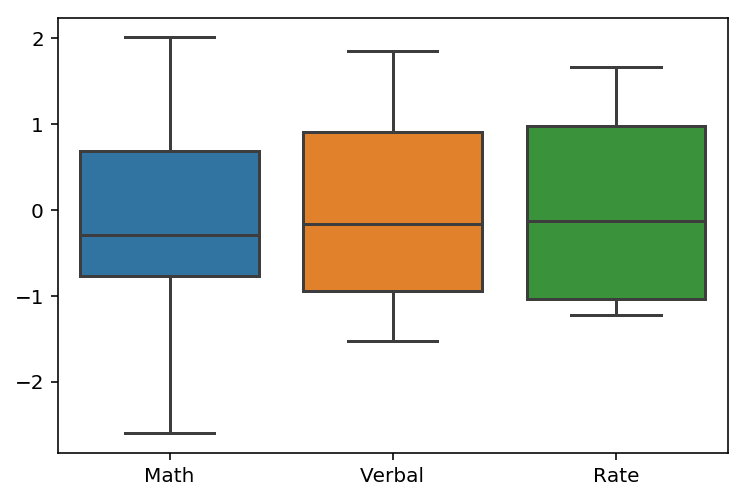

In [11]:
def norm (col):
    return (col - np.mean(col))/np.std(col)

df_norm = df1.loc[:,['Math','Verbal','Rate']].apply(norm)
sns.boxplot(data=df_norm)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [12]:
df1_mean_verbal=df1[df1.Verbal > np.mean(df1.Verbal)]
df1_mean_verbal.shape

(24, 4)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [13]:
df1_med_verbal=df1[df1.Verbal > np.median(df1.Verbal)]
df1_med_verbal.shape
#lower median, removes high outliers

(26, 4)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [14]:
df_vm_diff = df1['Verbal']-df1['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [15]:
df_mv_diff = df1['Math'] - df1['Verbal']
print(df_vm_diff.sort_values(ascending=False).head(3))
print(df_mv_diff.sort_values(ascending=False).head(3))

27    95
50    15
29    15
dtype: int64
21    30
23    19
1     14
dtype: int64


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [16]:
df1.loc[:,['Math','Verbal','Rate']].corr()

,Math,Verbal,Rate
Math,1.000000,0.899871,-0.773746
Verbal,0.899871,1.000000,-0.886432
Rate,-0.773746,-0.886432,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [17]:
df1.describe()
#count = number of rows
#mean = average of column
#std = standard deviation
#min = minimum value
#25% = 25% quartile range
#50% = 50% quartile range
#75% = 75 quartile range
#max = maximum value

,Math,Rate,Verbal
count,52.000000,52.000000,52.000000
mean,531.500000,37.153846,532.019231
std,36.014975,27.301788,33.236225
min,439.000000,4.000000,482.000000
25%,504.000000,9.000000,501.000000
50%,521.000000,33.500000,526.500000
75%,555.750000,63.500000,562.000000
max,603.000000,82.000000,593.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [18]:
df1.loc[:,['Math','Verbal','Rate']].cov()

,Math,Verbal,Rate
Math,1297.078431,1077.147059,-760.803922
Verbal,1077.147059,1104.646682,-804.355958
Rate,-760.803922,-804.355958,745.387632


In [19]:
#1: both are measures of how one metric changes in response to changes in the other, however 
# covariance are measured in the respective units of each metric. correlation is 
# normalized covariance without units 
#2: correlation is covariance divided by their standard deviation 
#3: since correlation is a normalized form of covariance, the items are able to be
# compared 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [20]:
drugdf = pd.read_csv('drug-use-by-age.csv')

In [85]:
# create an age reference point
newarr=np.empty(len(drugdf['age']))
newn=np.empty(len(drugdf['age']))
for ind,v in enumerate(drugdf['age']):   
    try:
        newarr[ind]= float(v)
#         newn[ind]=float(drugdf.iloc(ind,['n']))
    except:
        if ('-' in v):
            vmin = float(v.split('-')[0])
            vmax = float(v.split('-')[1])
            newarr[ind] = vmin + (vmax-vmin)/2.
#             newn[ind] = float(drugdf.iloc(ind ,['n'])) / (vmax-vmin)
        elif ('+' in v):
            newarr[ind] = float(v.replace('+',''))
#             newn[ind]=float(drugdf.iloc(ind,['n']))
drugdf['agept']=pd.Series(newarr)
   
drugdf = drugdf.replace(to_replace='-',value=0.0)
drugdf['cocaine-frequency'] =drugdf['cocaine-frequency'].map(float) 
drugdf['crack-frequency'] =drugdf['cocaine-frequency'].map(float) 
drugdf['heroin-frequency'] =drugdf['cocaine-frequency'].map(float)
drugdf['inhalant-frequency'] =drugdf['cocaine-frequency'].map(float)
drugdf['oxycontin-frequency'] =drugdf['cocaine-frequency'].map(float)
drugdf['meth-frequency'] =drugdf['cocaine-frequency'].map(float)
drugdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [22]:
freqlist = drugdf.columns[['freq' in c or 'agept' in c for c in drugdf.columns]]
uselist = drugdf.columns[['use' in c or 'agept' in c for c in drugdf.columns]]
# drugdf.loc[:,freqlist]

In [76]:
freqdf = drugdf.loc[:,freqlist]
freqnormdf = (freqdf - freqdf.mean())/freqdf.std()

usedf = drugdf.loc[:,uselist]
usednormdf = (usedf - usedf.mean())/usedf.std()

useratiodf = usedf.loc[:,usedf.columns.drop('agept')].divide(map(float, drugdf['n']),axis=0)
useratiodf['agept'] = drugdf['agept']


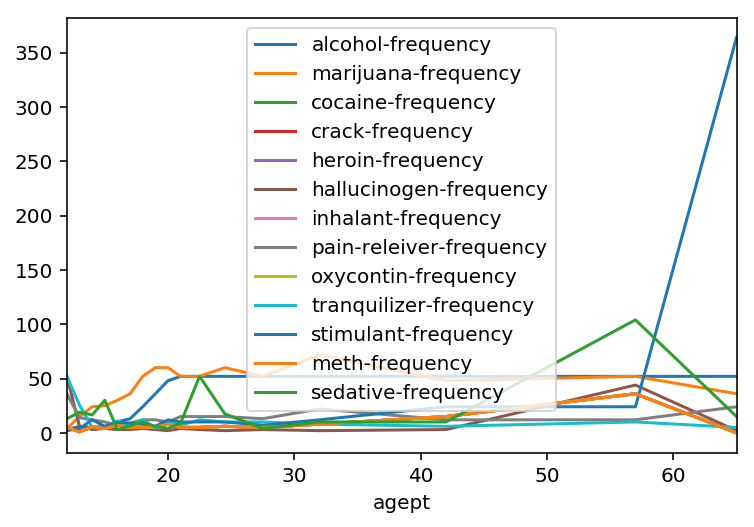

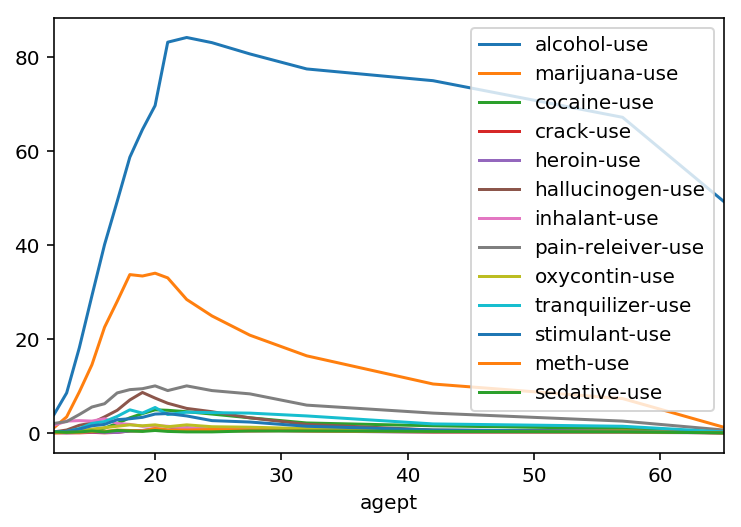

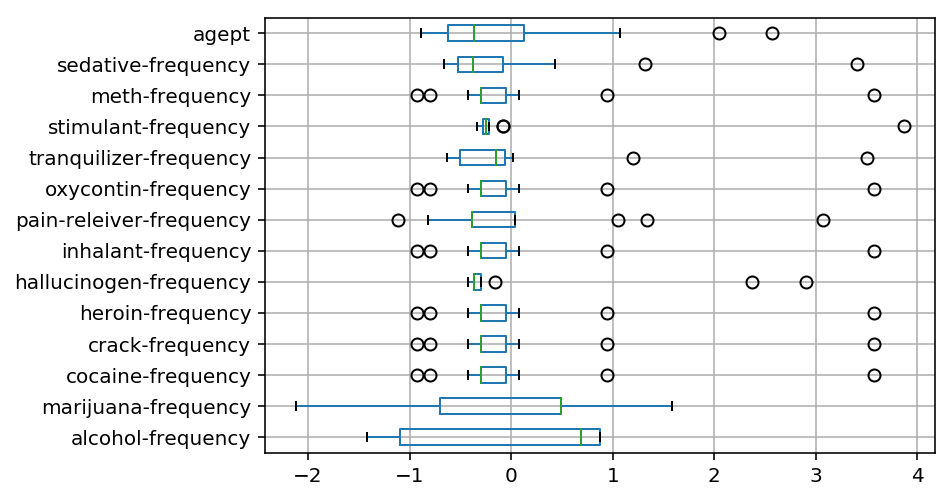

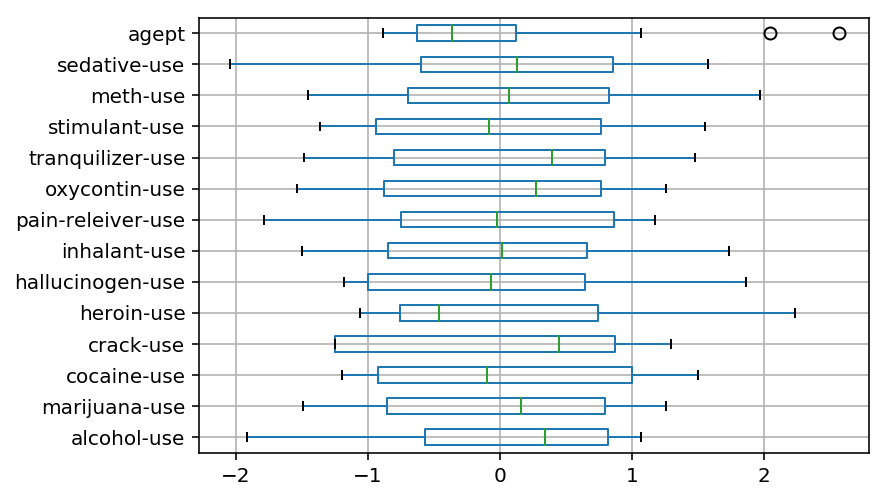

In [140]:
freqdf.plot(x='agept')
usedf.plot(x='agept')
# useratiodf.plot(x='agept')
freqnormdf.plot(kind='box', grid=True, vert=False)
usednormdf.plot(kind='box', grid=True, vert=False)

In [ ]:
freqcorr = freqdf.corr()
usecorr = usedf.corr()

plt.figure(figsize=(20,20))
sns.heatmap(freqcorr, xticklabels=freqcorr.columns,yticklabels=freqcorr.columns)
plt.figure()
sns.heatmap(usecorr, xticklabels=usecorr.columns,yticklabels=usecorr.columns)


1: crack-freq and heroin freq are exactly the same

2: huge early spikes in hallucinogen, pain-reliever, tranq-reliever,

3: huge late spikes in stimulant,sedative

4: people who drink and use weed are 1 group

5: people who use heroin, crack, cocaine are 1 group

6: inhalant use seems strange

7: sedative use seems highly correlated to everything

8: painreliever frequency, tranq freq,halluc freq, stimulant freq, sedativefreq & meth freq are in 1 group

9: age + alcohol use

10: painreliever, oxycontin,tranq, stimulant,meth, sedative use are highly correlated

11: weedfrequency imght have erroneous data due to the straight line issue

12: There are a lot of outliers in frequencies data 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


Question: is mean of alchohol frequency the same as the mean of marijuana frequency?
Hypothesis: the mean is the same
Null Hypothesis: the difference in the mean is 0
Alt Hypothesis: the difference in the mean is ~= 0
By the Heatmap, alcohol frequency is highly correlated to marijuana frequency

Deliverable: a p-value on the question


In [136]:
# Code
alpha = 0.05
print(stats.ttest_ind(freqdf['alcohol-frequency'],freqdf['marijuana-frequency']))
# print(stats.ttest_ind(usedf['alcohol-use'],usedf['marijuana-use']))



# usedf[['alcohol-use','marijuana-use']]

Ttest_indResult(statistic=-1.4050418979783086, pvalue=0.169642784061864)


**Report**



at a 95% confidence level, we have a P value of 0.16, which is larger than $\alpha=0.05$ Therefore we accept the null hypothesis where the mean of alcohol frequency is the same as that of the mean of marijuana frequency. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

# Answer
Turkey Fences
[Q1 - k(Q3 - Q1),Q3 + k(Q3-Q1)]

No outliers? 
Second test = mean(N) +- 3* std(N)

# There are no outliers

In [27]:
def turkeyfence(col, k=1.5):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    return (q1-k*(q3-q1),q3+k*(q3-q1))
rate = df1['Rate']
print(rate.describe())
print(turkeyfence(rate))

# There are no outliers

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64
(-72.75, 145.25)


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [38]:
sp = df1.loc[:,['Verbal','Math']]
print(sp.corr(method='spearman'))
print(sp.corr(method='pearson'))

          Verbal      Math
Verbal  1.000000  0.905205
Math    0.905205  1.000000
          Verbal      Math
Verbal  1.000000  0.899871
Math    0.899871  1.000000


# 1:
The spearman correlation is slightly larger than the Pearson correlation. I.e. there is less of a linear relationship but it is a monotonic relation

# 2:
First we give the each value a rank order. (Column R_math, R_verbal)
Then we calculate the difference between the ranks columnwise (Math-Rank minus Verbal Rank). (Column R_d)
Then we find the square of the rank difference (Column R_d2)
then we Sum the squared rank difference (\sigma R_d2)

Formula:
$$
R_{coef} = 1 - \frac{6\Sigma{d^2}}{n^3 - n}
$$
where $$n$$ is the number of observations

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [115]:
perscore = pd.Series([stats.percentileofscore(df1['Rate'],n,kind='rank') for n in df1['Rate']])
df1['PerScore'] = perscore
print(df1[df1['State']=='CA'])
# print(np.percentile(df1['Rate'])[df1[df1['State']=='CA']])

    Math  Rate State  Verbal   PerScore
23   517    51    CA     498  56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

One can quickly check the rank of the value in relation to the rest of the dataset, and decide on a threshold to determine what is an outlier and what is not. 

,alcohol-use,agept
0,2.941176,12.0
1,8.823529,13.0
2,14.705882,14.0
3,20.588235,15.0
4,26.470588,16.0


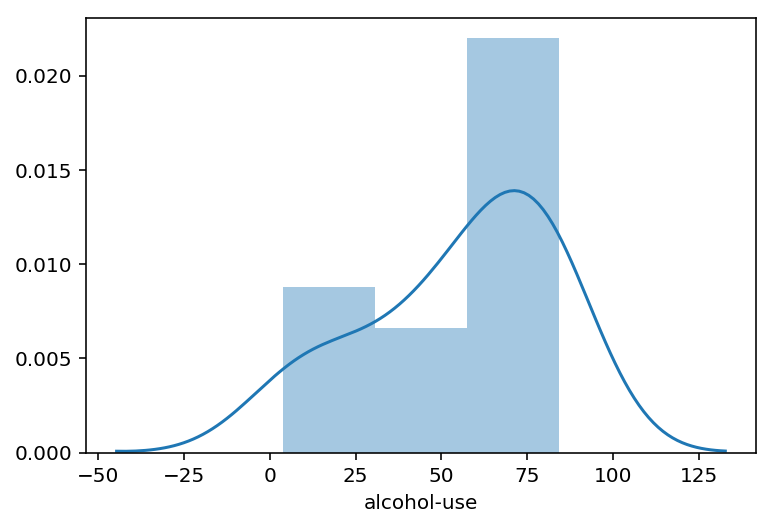

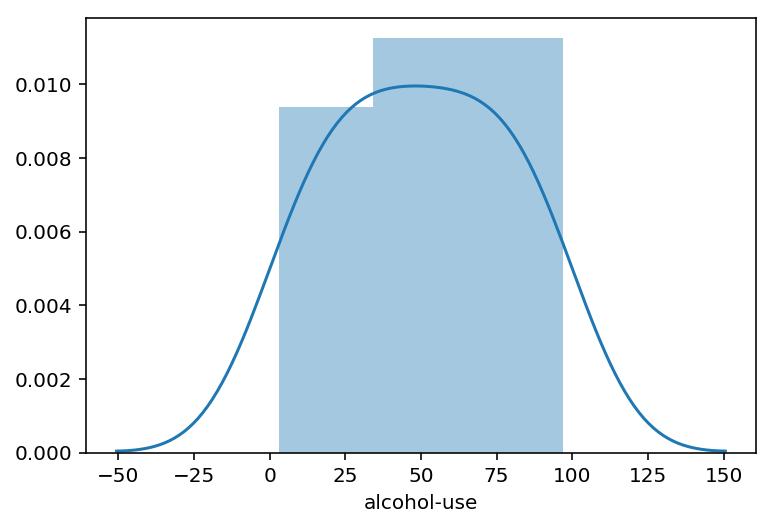

In [123]:
alc = drugdf.loc[:,['alcohol-use','alcohol-frequency']]
sns.distplot(alc['alcohol-use'])
alcperscore = pd.DataFrame([stats.percentileofscore(alc['alcohol-use'],n,kind='mean') for n in alc['alcohol-use']])
alcperscore['agept'] =drugdf['agept']
alcperscore.rename(columns={0:'alcohol-use'}, inplace=True)
plt.figure()

sns.distplot(alcperscore['alcohol-use'])

essentially 